In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from sklearn.impute   import SimpleImputer
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/Datasets/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

In [ ]:
df.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [ ]:
df.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

In [ ]:
# Data Preparation
df['AGE_PERCENTIL'] = df['AGE_PERCENTIL'].str.replace('Above ','').str.extract(r'(.+?)th')
df['WINDOW'] = df['WINDOW'].str.replace('ABOVE_12','12-more').str.extract(r'(.+?)-')

In [ ]:
 # Missingness as features
df['row_missingness'] = df.isnull().sum(axis=1)

In [ ]:
# Mean imputation
mean_impute  = SimpleImputer(strategy='mean')
imputed_data = mean_impute.fit_transform(df)
imputed_data = pd.DataFrame(imputed_data, columns = df.columns)

In [ ]:
imputed_data.isnull().sum()

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
row_missingness               0
Length: 232, dtype: int64

In [ ]:
imputed_data.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,row_missingness
0,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,180.0
1,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0,180.0
2,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,4.0,0.0,36.0
3,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-0.786997,-0.715950,-0.817800,-0.719147,-1.000000,-1.000000,6.0,0.0,204.0
4,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,12.0,1.0,0.0


In [ ]:
target=["ICU"]
un=["row_missingness"]
numericals=list(set(imputed_data.columns.values)-set(target)-set(un))
len(numericals)

230

In [ ]:
new_df=imputed_data[numericals]
new_df.shape
tar=imputed_data[target]
tar.shape
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.3)
x.shape

(1347, 230)

In [ ]:
y.head(5)

,ICU
90,0.0
1742,0.0
1508,0.0
96,0.0
1837,1.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [ ]:
pred_val=lr.predict(x_test)

In [ ]:
lr.predict_proba(x_test)[:,1]

array([0.09052134, 0.15560696, 0.1279024 , 0.10652919, 0.18299646,
       0.93084057, 0.1764071 , 0.71202946, 0.51435349, 0.98310303,
       0.08149141, 0.02691549, 0.20873888, 0.87966499, 0.27807364,
       0.01299537, 0.32298096, 0.1261645 , 0.22537486, 0.12341274,
       0.01934795, 0.04415533, 0.20008262, 0.03386924, 0.24530703,
       0.0257701 , 0.03646281, 0.02773396, 0.23161364, 0.78951729,
       0.52476982, 0.07135823, 0.15333936, 0.06519791, 0.04766517,
       0.13387322, 0.05059143, 0.99593983, 0.54857277, 0.0695377 ,
       0.99447125, 0.95356796, 0.07249261, 0.02989196, 0.06755268,
       0.02038362, 0.16275208, 0.15630689, 0.21350131, 0.99227648,
       0.1720306 , 0.72457476, 0.0570457 , 0.01153157, 0.23165928,
       0.18923922, 0.50901765, 0.00978397, 0.03989224, 0.1379071 ,
       0.28875554, 0.06753989, 0.68239409, 0.29235536, 0.0533803 ,
       0.06181971, 0.99781756, 0.09360852, 0.24453984, 0.09970682,
       0.99638722, 0.0602795 , 0.44580952, 0.03654879, 0.49771

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
accuracy_score(y_test,pred_val)

0.8477508650519031

In [ ]:
confusion_matrix(y_test,pred_val)

array([[395,  26],
       [ 62,  95]])

In [ ]:
import pickle
saved_model1=pickle.dumps(lr)

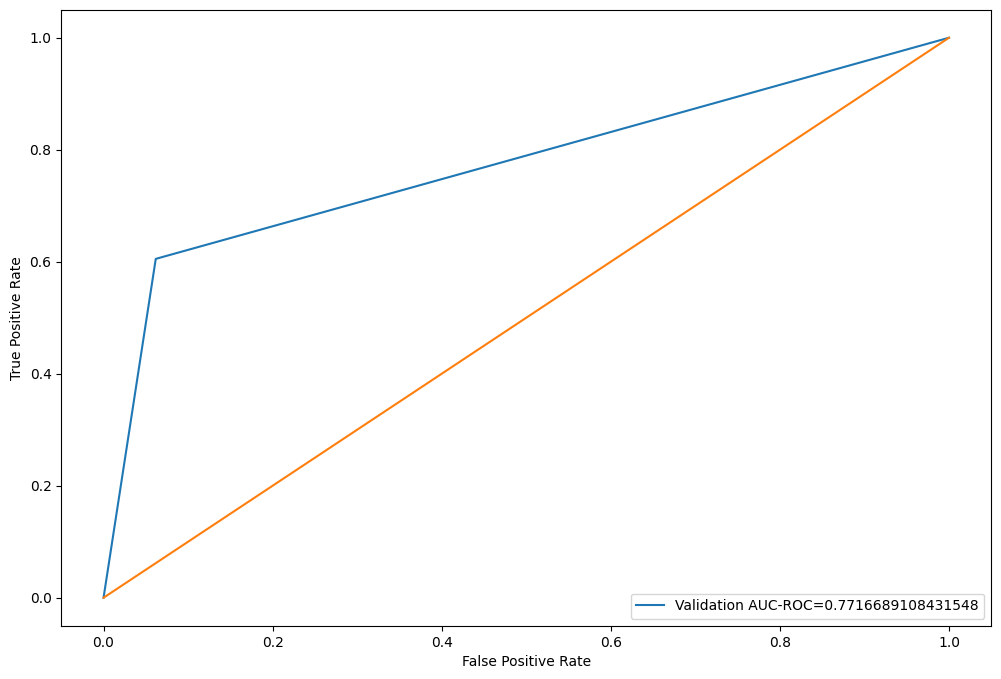

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fpr,tpr,_=roc_curve(y_test,pred_val)
auc = roc_auc_score(y_test, pred_val)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
model23=LogisticRegression()

In [ ]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,tar)

10

In [ ]:
for train_index,test_index in skf.split(new_df,tar):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=tar.iloc[train_index],tar.iloc[test_index]
    model23.fit(x1_train,y1_train)
    prediction=model23.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)

[0.8860103626943006, 0.8704663212435233, 0.8393782383419689, 0.8601036269430051, 0.8497409326424871, 0.84375, 0.8333333333333334, 0.875, 0.859375, 0.8489583333333334]


In [ ]:
np.array(accuracy).mean()
pred23=model23.predict(x_test)
pred23

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

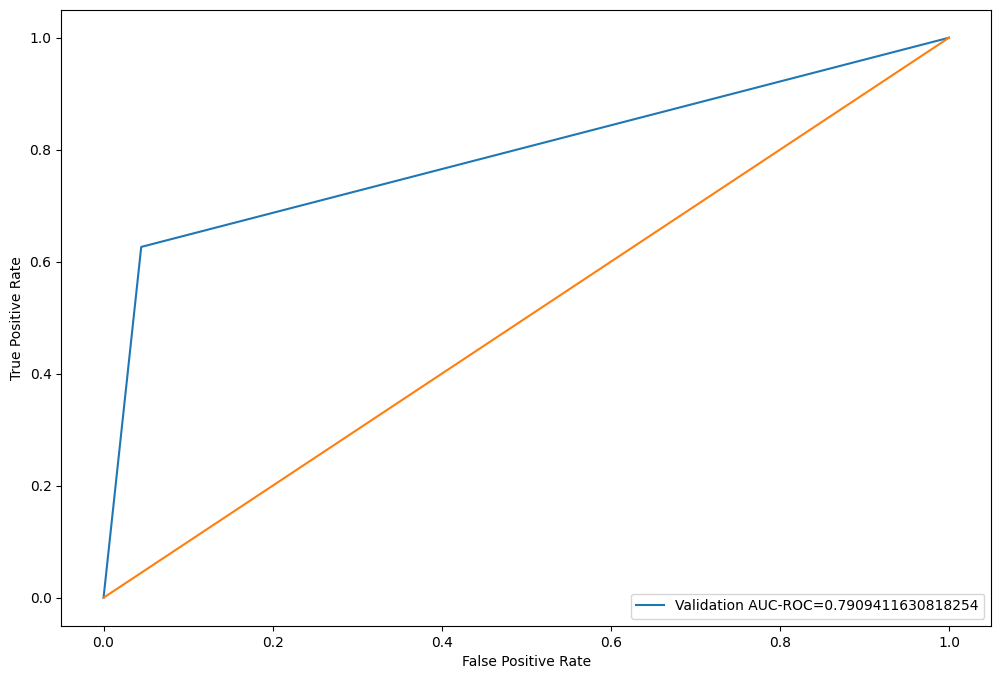

In [ ]:
fpr,tpr,_=roc_curve(y_test,pred23)
auc = roc_auc_score(y_test, pred23)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
confusion_matrix(y_test,pred23)

array([[386,  18],
       [ 65, 109]])

In [ ]:
import pickle

In [ ]:
saved_model2=pickle.dumps(model23)

In [ ]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.4)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x,y)

GaussianNB()

In [ ]:
y_pred1=nb.predict(x_test)
y_pred1

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.7688311688311689

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[503,  34],
       [144,  89]])

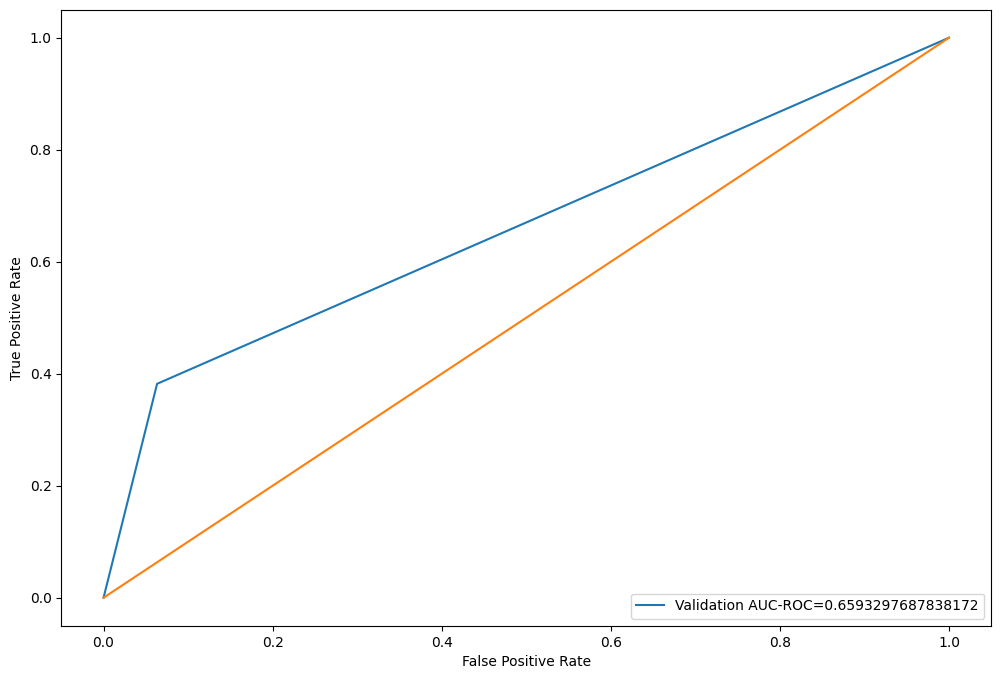

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred1)
auc = roc_auc_score(y_test, y_pred1)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
import pickle
saved_model3=pickle.dumps(nb)

In [ ]:
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,tar)

10

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb2=GaussianNB()
for train_index,test_index in skf.split(new_df,tar):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=tar.iloc[train_index],tar.iloc[test_index]
    nb2.fit(x1_train,y1_train)
    prediction=nb2.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    acc.append(score)
print(acc)

[0.7823834196891192, 0.7616580310880829, 0.7461139896373057, 0.7875647668393783, 0.772020725388601, 0.8020833333333334, 0.78125, 0.7916666666666666, 0.8072916666666666, 0.7916666666666666]


In [ ]:
np.array(acc).mean()

0.7823699265975821

In [ ]:
pred34=nb2.predict(x_test)

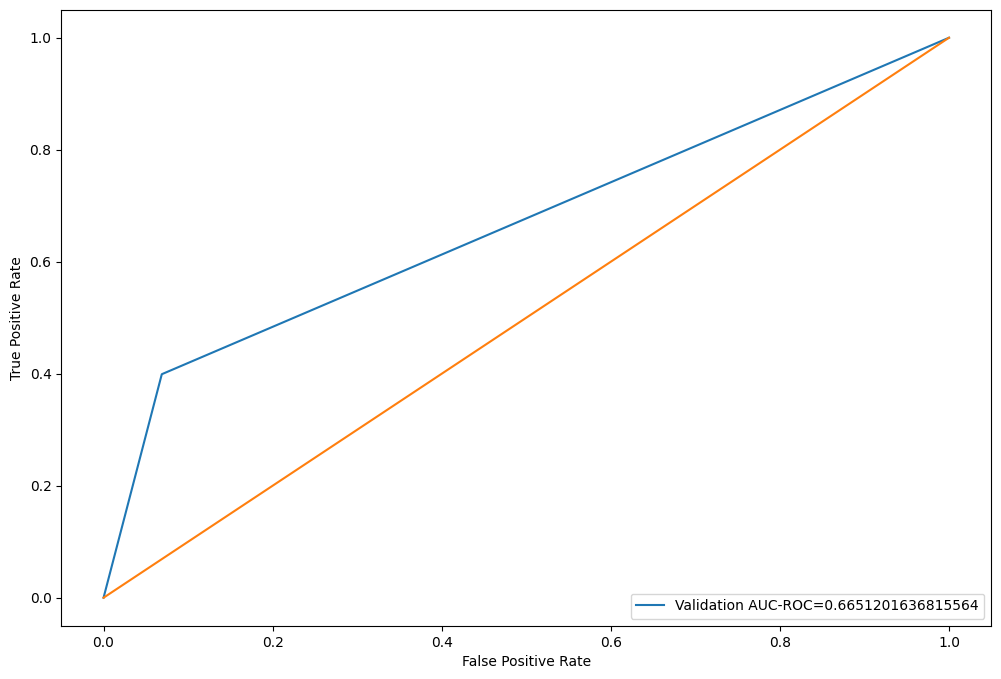

In [ ]:
fpr,tpr,_=roc_curve(y_test,pred34)
auc = roc_auc_score(y_test, pred34)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
confusion_matrix(y_test,pred34)

array([[500,  37],
       [140,  93]])

In [ ]:
saved_model4=pickle.dumps(nb2)

In [ ]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.3)
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x,y)
pred=sgd.predict(x_test)
pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
accuracy_score(y_test,pred)

0.7958477508650519

In [ ]:
confusion_matrix(y_test,pred)

array([[413,  13],
       [105,  47]])

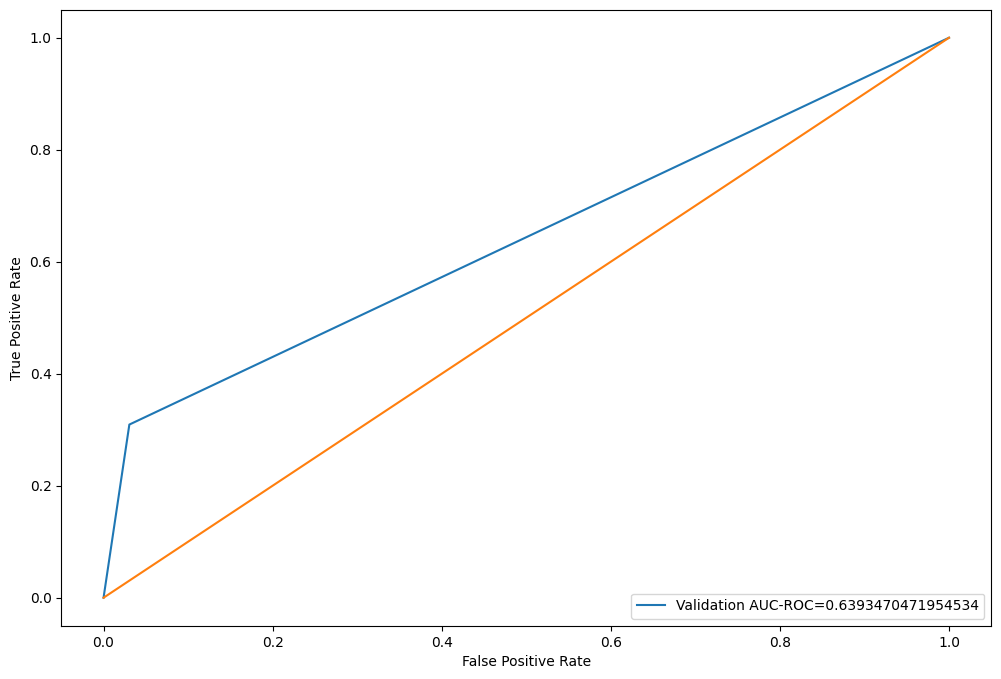

In [ ]:
fpr,tpr,_=roc_curve(y_test,pred)
auc = roc_auc_score(y_test, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
saved_model5=pickle.dumps(sgd)

In [ ]:
from sklearn.model_selection import StratifiedKFold
acc2=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,tar)

10

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd2=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
for train_index,test_index in skf.split(new_df,tar):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=tar.iloc[train_index],tar.iloc[test_index]
    sgd2.fit(x1_train,y1_train)
    prediction=nb2.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    acc2.append(score)
print(acc2)
saved_model6=pickle.dumps(sgd2)

[0.7823834196891192, 0.7616580310880829, 0.7461139896373057, 0.8031088082901554, 0.7823834196891192, 0.8072916666666666, 0.796875, 0.796875, 0.8125, 0.7916666666666666]


In [ ]:
np.array(acc2).mean()

0.7880856001727117

In [ ]:
pred45=sgd2.predict(x_test)

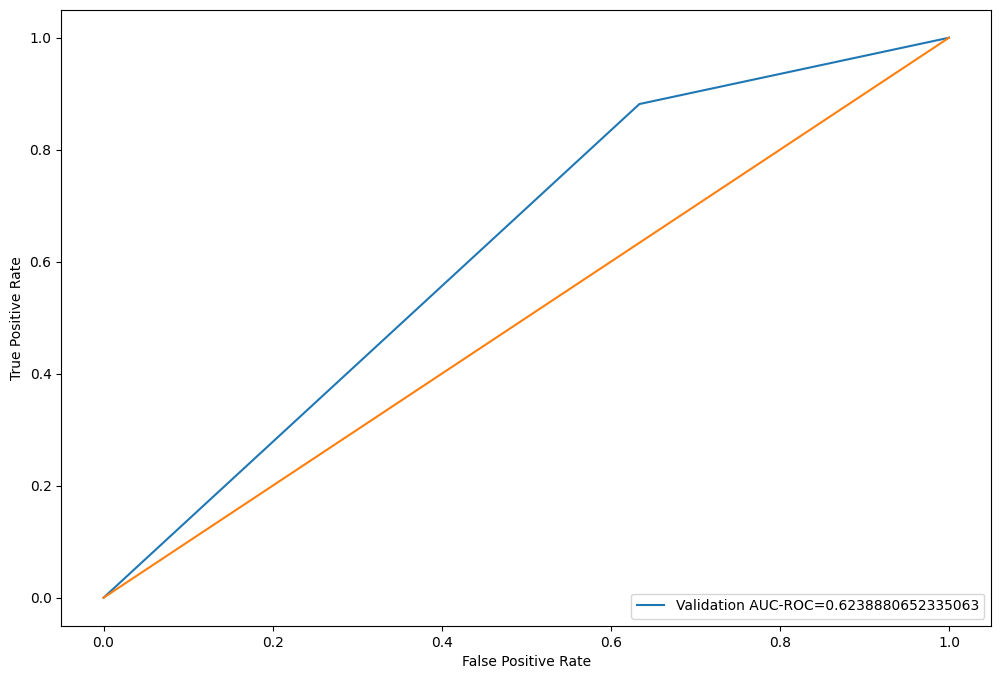

In [ ]:
fpr,tpr,_=roc_curve(y_test,pred45)
auc = roc_auc_score(y_test, pred45)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
confusion_matrix(y_test,pred45)

array([[156, 270],
       [ 18, 134]])

In [ ]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.4)
from xgboost import XGBClassifier
model7=XGBClassifier()
model7.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred7=model7.predict(x_test)

In [ ]:
pred7

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
accuracy_score(pred7,y_test)

0.8922077922077922

In [ ]:
confusion_matrix(y_test,pred7)

array([[557,  31],
       [ 52, 130]])

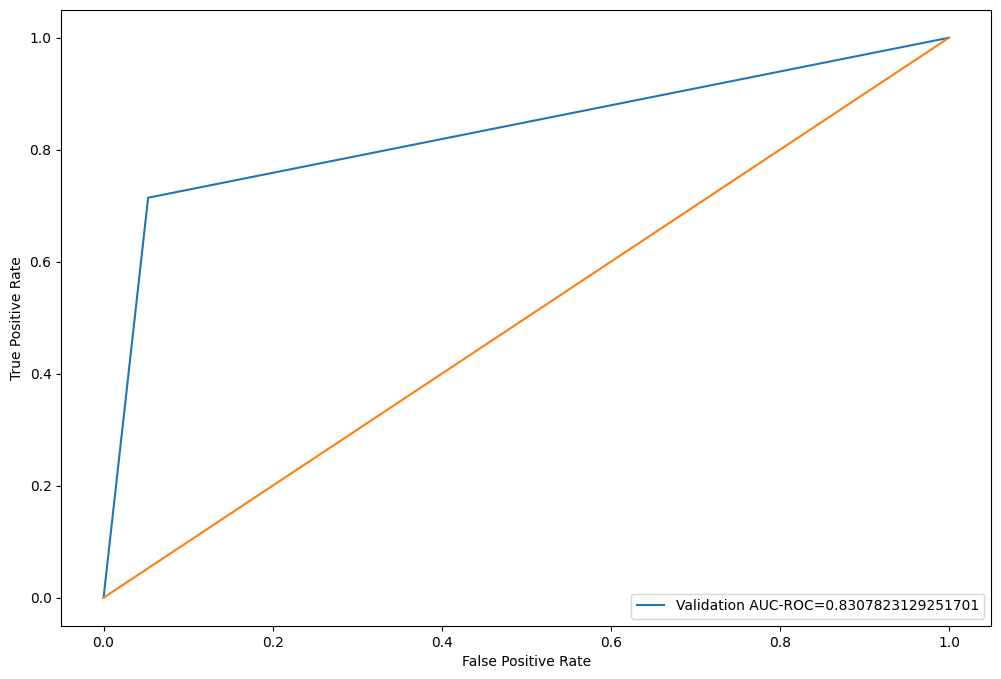

In [ ]:
fpr,tpr,_=roc_curve(y_test,pred7)
auc = roc_auc_score(y_test, pred7)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
saved_model7=pickle.dumps(model7)

In [ ]:
from sklearn.model_selection import StratifiedKFold
acc3=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,tar)

10

In [ ]:
from xgboost import XGBClassifier
model8=XGBClassifier()
for train_index,test_index in skf.split(new_df,tar):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=tar.iloc[train_index],tar.iloc[test_index]
    model8.fit(x1_train,y1_train)
    prediction=model8.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    acc3.append(score)
print(np.array(acc3).mean())

0.835886226252159


In [ ]:
pred56=model8.predict(x_test)

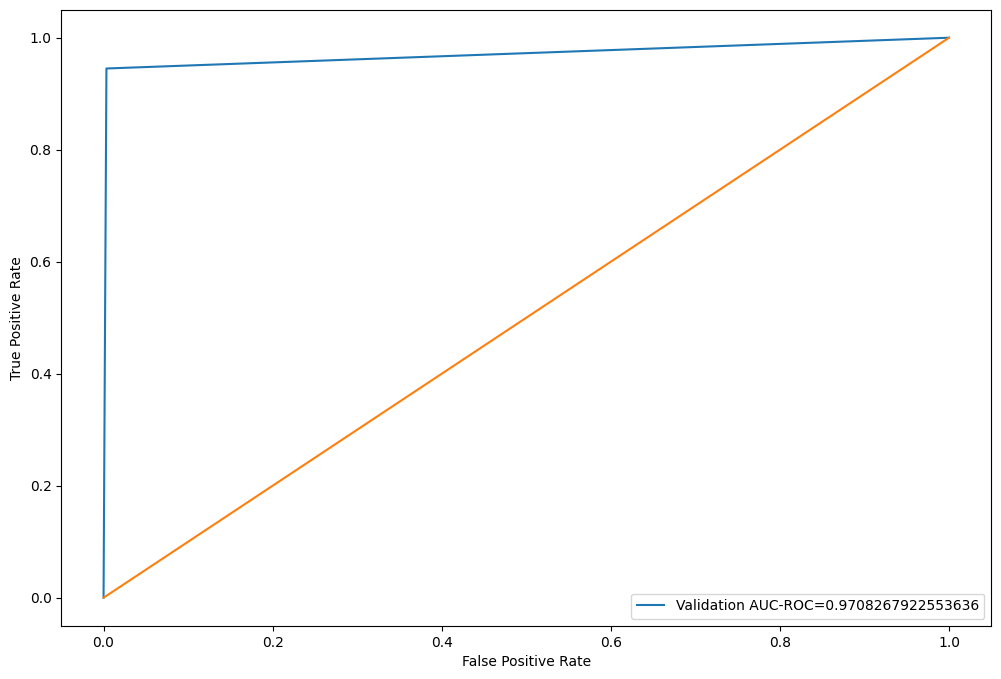

In [ ]:
fpr,tpr,_=roc_curve(y_test,pred56)
auc = roc_auc_score(y_test, pred56)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
confusion_matrix(y_test,pred56)

array([[586,   2],
       [ 10, 172]])

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('xgb', XGBClassifier()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['xgb'] = XGBClassifier()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.4)
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>lr 0.853 (0.031)
>xgb 0.884 (0.025)
>bayes 0.786 (0.033)


In [ ]:
b=[]
for i in range(4):
    b.append(results[i].mean())
b
plt.bar(names,b,color=["red","blue","orange","green"])